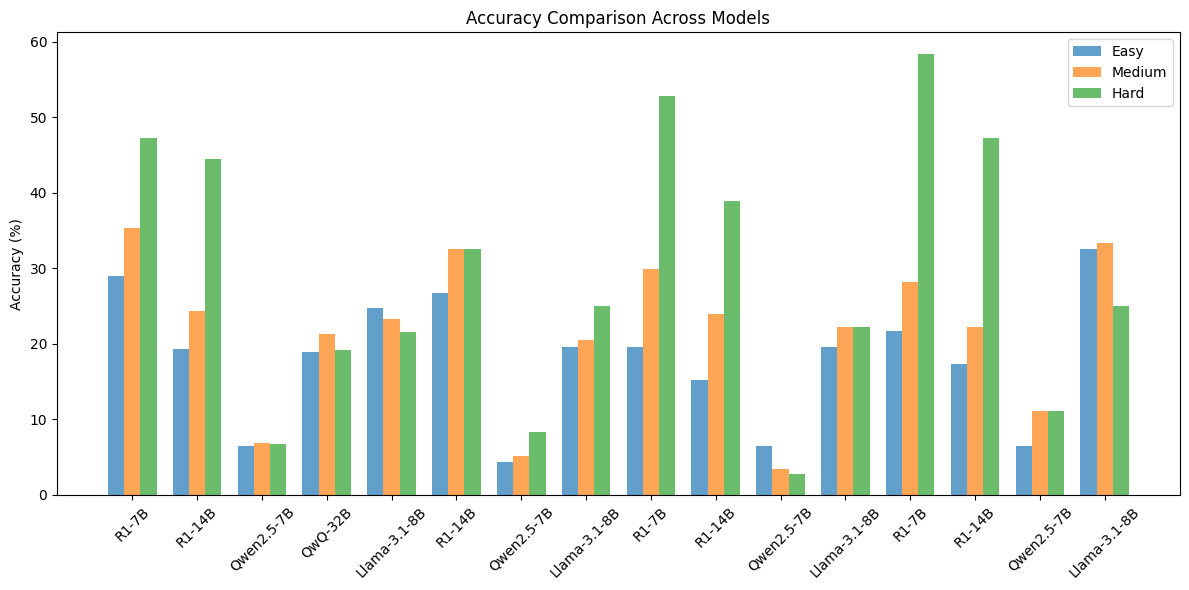

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "R1-7B", "R1-14B", "Qwen2.5-7B",
    "QwQ-32B", "Llama-3.1-8B", "R1-14B",
    "Qwen2.5-7B", "Llama-3.1-8B", "R1-7B",
    "R1-14B", "Qwen2.5-7B", "Llama-3.1-8B",
    "R1-7B", "R1-14B", "Qwen2.5-7B",
    "Llama-3.1-8B"
]
easy_acc = [29.032, 19.318, 6.452, 18.889, 24.731, 26.733, 4.348, 19.565, 19.565, 15.217, 6.522, 19.565, 21.739, 17.391, 6.522, 32.609]
med_acc = [35.345, 24.348, 6.897, 21.304, 23.276, 32.584, 5.128, 20.513, 29.915, 23.932, 3.419, 22.222, 28.205, 22.222, 11.111, 33.333]
hard_acc = [47.297, 44.444, 6.757, 19.178, 21.622, 32.558, 8.333, 25.000, 52.778, 38.889, 2.778, 22.222, 58.333, 47.222, 11.111, 25.000]

x = np.arange(len(models))  # X-axis positions

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25

ax.bar(x - bar_width, easy_acc, width=bar_width, label="Easy", alpha=0.7)
ax.bar(x, med_acc, width=bar_width, label="Medium", alpha=0.7)
ax.bar(x + bar_width, hard_acc, width=bar_width, label="Hard", alpha=0.7)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, fontsize=10)
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy Comparison Across Models")
ax.legend()

plt.tight_layout()
plt.show()


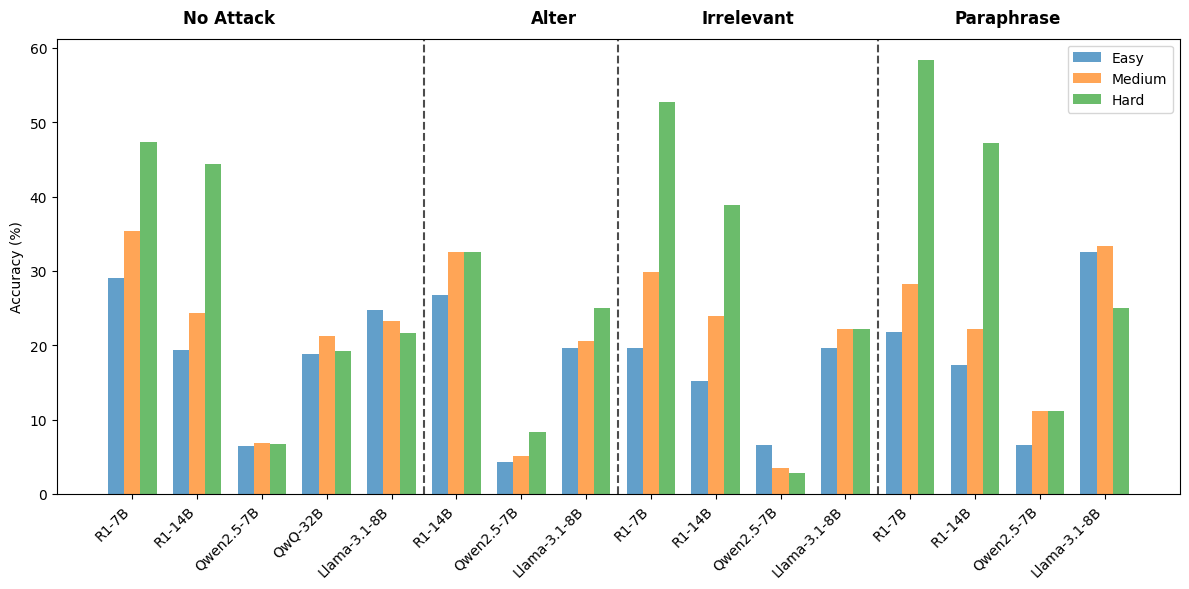

In [7]:
# Group models by attack type based on the table
attack_types = [
    "No Attack"] * 5 + ["Alter"] * 3 + ["Irrelevant"] * 4 + ["Paraphrase"] * 4

# Define unique attack types and their positions
unique_attacks = list(dict.fromkeys(attack_types))  # Preserve order

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25

# Plot bars
x = np.arange(len(models))  # X-axis positions
ax.bar(x - bar_width, easy_acc, width=bar_width, label="Easy", alpha=0.7)
ax.bar(x, med_acc, width=bar_width, label="Medium", alpha=0.7)
ax.bar(x + bar_width, hard_acc, width=bar_width, label="Hard", alpha=0.7)

# Formatting x-axis with attack type separation
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Accuracy (%)")
# ax.set_title("Accuracy Comparison Across Models")

# Add vertical lines to separate attack types
prev_index = 0
for attack in unique_attacks[1:]:  # Skip first attack type
    index = attack_types.index(attack)
    ax.axvline(x=index - 0.5, color="black", linestyle="dashed", alpha=0.7)
    prev_index = index

# Add attack type labels above the chart
for attack in unique_attacks:
    index = attack_types.index(attack)
    ax.text(index + 1.5, max(hard_acc) + 5, attack, ha="center", fontsize=12, fontweight="bold")

ax.legend()
plt.tight_layout()
plt.show()
